## Group no.5: Nitish goyal 18510063 Rachana choudhary 18510063

The 1D Schrodinger equation 
$$ \left ( -\frac{\hbar^2}{2 m_e} \frac{d^2}{dx^2}  + V(x) \right ) \, \psi(x) = E \, \psi(x) $$
where $V(x)$ is the potential.

We can make this equation dimensionless in so-called __Hartree__ units, where:
$$ \text{(1 Hartree)}: E_h \,  = \frac{\hbar^2}{2 m_e a_0^2} = 27.2113802 \, \text{eV}$$
and where distances are normalized with respect to the Bohr radius $a_0 = 5.29177210903 \times 10^{-11} \, \text{m}$. 

Other useful relation when you have Coulombic potentials (e.g. Hydrogen atom): $$a_0 = \frac{4\pi\epsilon_0\, \hbar^2}{m_e e^2}.$$


Using the matrix representation of SE as discussed in class, calculate first few (about 10) eigenvalues $E_n$ for 

* a infinitely deep potential well of size $L= a_0$. Check that $E_n$ agrees with analytical values. Check how eigenvalues change when the size is halved or doubled. Check that $E_n$ scales with $n$ as expected.

* a finite square-well potential of same size as above (Choose a suitable depth). Check that $E_n$ scales with $n$ as expected. How do these eigenvalues compare with the infinitely deep well above? Are they always more or less?

* a Harmonic oscillator potential $V(x) = (x/0.025)^2$ and compare them against the analytical values. What happens when you add a quartic term to the potential - how do the eigenvalues change?



For each of the cases above, plot the first three eigenfunctions (increasing order of energy eigenvalues).

For the infinitely deep square well, consider an arbitrary state $\psi$ given by a half-circle placed at the centre of the box. Numerically calculate the energy expectation value $\langle E \rangle$ for this state. Is it more or less than the ground state eigen-value?

In [227]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt


## [1] infinitely deep potential 

In [351]:
N=1000
v1=10**7*np.ones(N)
v2=np.zeros(N)
V=np.concatenate((v1,v2,v1),axis=0)[::3]
dx=3/1000

In [352]:
diagonals=[(2/dx**2)*np.ones(1000)+V,-1/dx**2*np.ones(999),-1/dx**2*np.ones(999)]
H=diags(diagonals, [0, -1, 1]).toarray()
eva,eve=eigsh(H,1000)

In [366]:
print(('Eigen values determined', eva[:10]))

analytic_E=np.array([i**2*np.pi**2 for i in range(1,11)])
print('Analytic Eigen values',analytic_E)



('Eigen values determined', array([  9.82887793,  39.31464248,  88.45468601, 157.2446627 ,
       245.67848895, 353.74834389, 481.4446701 , 628.75617446,
       795.6698291 , 982.1708726 ]))
Analytic Eigen values [  9.8696044   39.4784176   88.82643961 157.91367042 246.74011003
 355.30575844 483.61061565 631.65468167 799.43795649 986.96044011]


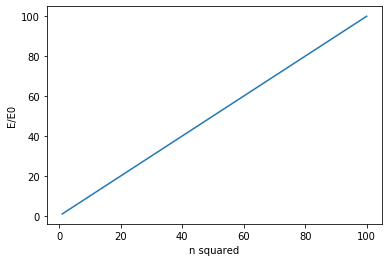

In [367]:
plt.plot([i**2 for i in range(1,11)],eva[:10]/eva[0])
plt.xlabel('n squared')
plt.ylabel('E/E0')
plt.show()


### first three eigenfunctions for infinite square well potential

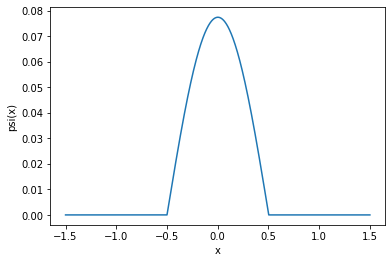

In [370]:
plt.plot(np.linspace(-1.5,1.5,1000),eve[:,0])
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.show()

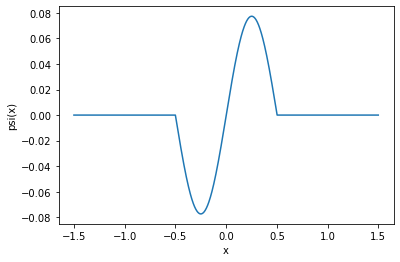

In [371]:
plt.plot(np.linspace(-1.5,1.5,1000),eve[:,1])
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.show()

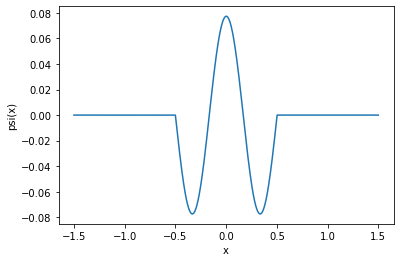

In [372]:
plt.plot(np.linspace(-1.5,1.5,1000),eve[:,2])
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.show()

### L doubled

In [373]:
N=1000
v1=10**7*np.ones(N)
v2=np.zeros(N)
V=np.concatenate((v1,v2,v1),axis=0)[::3]
dx=6/1000

In [374]:
diagonals=[(2/dx**2)*np.ones(1000)+V,-1/dx**2*np.ones(999),-1/dx**2*np.ones(999)]
H=diags(diagonals, [0, -1, 1]).toarray()

eva,eve=eigsh(H,1000)

('Eigen values determined', array([  2.45746138,   9.82962813,  22.1158481 ,  39.31503439,
        61.42566553,  88.44578556, 120.37300418, 157.20449703,
       198.93700591, 245.56683901]))


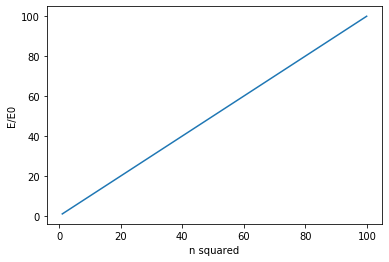

In [378]:
print(('Eigen values determined', eva[:10]))
plt.plot(eva[:10]/eva[0],[i**2 for i in range(1,11)])
plt.xlabel('n squared')
plt.ylabel('E/E0')
plt.show()


### L halved

In [379]:
N=1000
v1=10**7*np.ones(N)
v2=np.zeros(N)
V=np.concatenate((v1,v2,v1),axis=0)[::3]
dx=1.5/1000

In [380]:
diagonals=[(2/dx**2)*np.ones(1000)+V,-1/dx**2*np.ones(999),-1/dx**2*np.ones(999)]
H=diags(diagonals, [0, -1, 1]).toarray()

eva,eve=eigsh(H,1000)

('Eigen values determined', array([  39.30062111,  157.19901233,  353.68475765,  628.74049805,
        982.34193307, 1414.45782291, 1925.04999119, 2514.07332835,
       3181.47579555, 3927.19842932]))


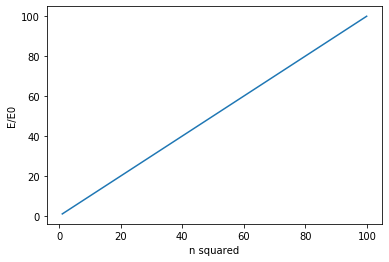

In [381]:
print(('Eigen values determined', eva[:10]))
plt.plot(eva[:10]/eva[0],[i**2 for i in range(1,11)])
plt.xlabel('n squared')
plt.ylabel('E/E0')
plt.show()


## Finite potential

In [382]:
N=1000
v1=10*np.ones(N)
v2=np.zeros(N)
V=np.concatenate((v1,v2,v1),axis=0)[::3]
dx=3/1000

('Eigen values determined', array([  3.53831853,  11.52692891,  17.66586531,  23.76569168,
        34.48485581,  46.44760721,  59.95693733,  77.03367935,
        95.48980778, 115.85118906]), 'Which are clearly smaller than the ones found in infinite well')


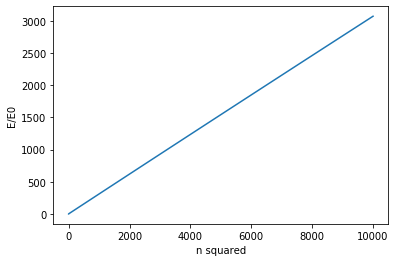

In [392]:
diagonals=[(2/dx**2)*np.ones(1000)+V,-1/dx**2*np.ones(999),-1/dx**2*np.ones(999)]
H=diags(diagonals, [0, -1, 1]).toarray()
eva,eve=eigsh(H,1000)

print(('Eigen values determined', eva[:10],'Which are clearly smaller than the ones found in infinite well'))

plt.plot([i**2 for i in range(1,101)],eva[:100]/eva[0])
plt.xlabel('n squared')
plt.ylabel('E/E0')
plt.show()


### first 3 eigen functions

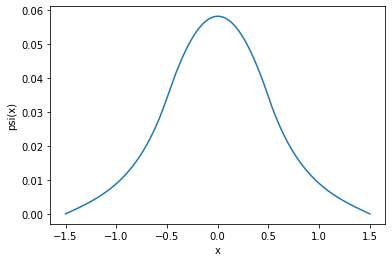

In [387]:
plt.plot(np.linspace(-1.5,1.5,1000),eve[:,0])
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.show()

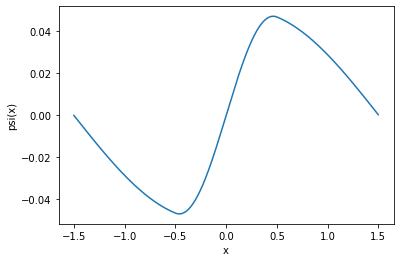

In [389]:
plt.plot(np.linspace(-1.5,1.5,1000),eve[:,1])
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.show()

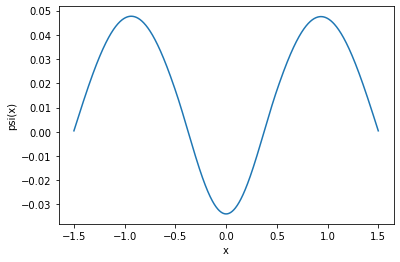

In [390]:
plt.plot(np.linspace(-1.5,1.5,1000),eve[:,2])
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.show()

Energy values found for finite potential are clearly less than the ones found for infinite potential. But the relationship i.e dependence with n squared is still same.

## Harmonic potential

In [393]:
V=(np.linspace(-1,1,1000))**2*1600

In [397]:
diagonals=[(2/dx**2)*np.ones(1000)+V,-1/dx**2*np.ones(999),-1/dx**2*np.ones(999)]
H=diags(diagonals, [0, -1, 1]).toarray()

print(('Eigen values determined', eva[:10]))

eva,eve=eigsh(H,1000)

('Eigen values determined', array([ 26.69295922,  80.07807602, 133.46158951, 186.84349961,
       240.22380625, 293.60250937, 346.97960888, 400.35510472,
       453.72899681, 507.10128508]))


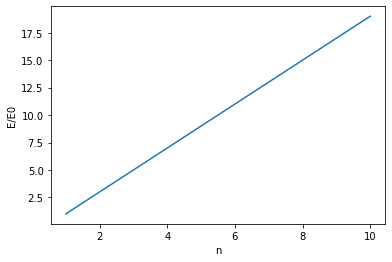

In [404]:
plt.plot([i for i in range(1,11)],eva[:10]/eva[0])
plt.xlabel('n')
plt.ylabel('E/E0')
plt.show()


Clearly energy eigen values are directly proportional to n

### Addition of quertic term

In [405]:
V=(np.linspace(-1,1,1000))**2*1600+(np.linspace(-1,1,1000))**4*10000

In [408]:
diagonals=[(2/dx**2)*np.ones(1000)+V,-1/dx**2*np.ones(999),-1/dx**2*np.ones(999)]
H=diags(diagonals, [0, -1, 1]).toarray()
eva,eve=eigsh(H,1000)

print(('Eigen values determined', eva[:10]))



('Eigen values determined', array([ 28.50126183,  88.56315804, 154.10892068, 224.13206062,
       298.00901309, 375.30295003, 455.686202  , 538.90159619,
       624.74061504, 713.02997531]))


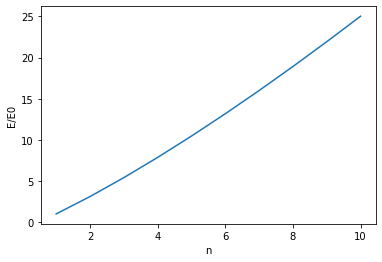

In [409]:
plt.plot([i for i in range(1,11)],eva[:10]/eva[0])
plt.xlabel('n')
plt.ylabel('E/E0')
plt.show()


On adding quertic term Energy eigen values are no longer directly proportional to n

## An arbitrary eigen state.

In [484]:
N=1000
v1=10**15*np.ones(N)
v2=np.zeros(N)
V=np.concatenate((v1,v2,v1),axis=0)[::3]
dx=1.64/1000

In [485]:
diagonals=[(2/dx**2)*np.ones(1000),-1/dx**2*np.ones(999),-1/dx**2*np.ones(999)]
H=diags(diagonals, [0, -1, 1]).toarray()
eva,eve=eigsh(H,1000)

In [486]:
psi=np.sqrt(np.ones(1000)-np.linspace(-1,1,1000)**2)


In [489]:
E_arb=np.dot(np.dot(psi,H),psi)/np.dot(psi,psi)

In [490]:
E_ground=9.82887793

In [491]:
E_arb-E_ground

0.11402174823569844

So the energy found for the given state is slightly more than the ground state